# Do Interictal DischargesAffect Functional Connectivity

author: Jeni Stiso (jeni.stiso@gmail.com)

words

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
import palettable

%matplotlib inline
sns.set_context('poster')
sns.set_style("whitegrid")

In [42]:
# directories - point this at you RAM data
RAM_dir = '/Volumes/bassett-data/Jeni/RAM/'

# load data
net_data = pd.read_csv(RAM_dir + 'group_analysis/network_stats.csv', index_col=0)
node_data = pd.read_csv(RAM_dir + 'group_analysis/node_stats.csv', index_col=0)

In [43]:
# cut out AR until you fix the bug
net_data = net_data[net_data['fc_measure'] != 'ar']
node_data = node_data[node_data['fc_measure'] != 'ar']

Check the data

In [9]:
net_data.head(10)

,band_measure,soz,n_tp,str_beta_bin,str_beta_num,fc_measure,band,subj,hand,age,gender,race
1,alpha_aec,0,480,-0.260915,0.237300,aec,alpha,R1284N,L,32,F,1.0
2,alpha_aec,1,480,-0.080397,0.184831,aec,alpha,R1284N,L,32,F,1.0
3,alpha_aec,2,480,-0.142330,0.129883,aec,alpha,R1284N,L,32,F,1.0
4,alpha_coh,0,480,-0.110311,0.111159,coh,alpha,R1284N,L,32,F,1.0
5,alpha_coh,1,480,-0.150670,0.131368,coh,alpha,R1284N,L,32,F,1.0
6,alpha_coh,2,480,-0.167599,0.145470,coh,alpha,R1284N,L,32,F,1.0
7,alpha_plv,0,480,-0.053955,0.030219,plv,alpha,R1284N,L,32,F,1.0
8,alpha_plv,1,480,-0.153924,0.203243,plv,alpha,R1284N,L,32,F,1.0
9,alpha_plv,2,480,-0.156534,0.225724,plv,alpha,R1284N,L,32,F,1.0
10,beta_aec,0,480,-0.401644,0.351186,aec,beta,R1284N,L,32,F,1.0


In [10]:
net_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8700 entries, 1 to 9280
Data columns (total 12 columns):
band_measure    8700 non-null object
soz             8700 non-null int64
n_tp            8700 non-null int64
str_beta_bin    7770 non-null float64
str_beta_num    7485 non-null float64
fc_measure      8700 non-null object
band            8700 non-null object
subj            8700 non-null object
hand            8520 non-null object
age             8700 non-null int64
gender          8700 non-null object
race            8310 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 883.6+ KB


In [11]:
net_data.describe()

,soz,n_tp,str_beta_bin,str_beta_num,age,race
count,8700.000000,8700.000000,7770.000000,7485.000000,8700.000000,8310.000000
mean,1.000000,1092.786207,-0.097853,0.138563,35.924138,2.889892
std,0.859078,1415.776152,0.518679,0.569832,12.006196,1.216895
min,0.000000,15.000000,-11.526225,-8.579157,0.000000,1.000000
25%,0.000000,151.000000,-0.227033,-0.078722,27.000000,2.000000
50%,1.000000,526.000000,-0.058898,0.071003,34.500000,4.000000
75%,2.000000,1292.000000,0.058926,0.307364,44.000000,4.000000
max,2.000000,7643.000000,8.681309,11.436665,66.000000,7.000000


In [12]:
node_data.head(10)

,elec,elec_in_soz,elec_has_spike,band_measure,n_tp,str_soz_beta_bin,str_not_soz_beta_bin,str_spike_beta_bin,str_not_spike_beta_bin,tr_soz_beta_bin,...,str_not_spike_beta_num,fc_measure,band,region,subj,hand,age,gender,race,str_soz_beta_num
1,LAD1,1,0,alpha_aec,53,0.035568,NaN,0.322999,-0.073891,-0.130336,...,-0.014999,aec,alpha,inferiortemporal,R1260D,R,57,F,2.0,NaN
2,LAD1,1,0,alpha_coh,53,0.184341,NaN,-0.442323,0.392283,-0.044302,...,-0.279130,coh,alpha,inferiortemporal,R1260D,R,57,F,2.0,NaN
3,LAD1,1,0,alpha_plv,53,0.240992,NaN,0.066864,0.249860,0.005847,...,-0.041181,plv,alpha,inferiortemporal,R1260D,R,57,F,2.0,NaN
4,LAD1,1,0,beta_aec,53,-0.230471,NaN,-0.325586,-0.150649,0.195735,...,0.094451,aec,beta,inferiortemporal,R1260D,R,57,F,2.0,NaN
5,LAD1,1,0,beta_coh,53,0.118668,NaN,0.093016,0.107053,-0.137310,...,-0.027199,coh,beta,inferiortemporal,R1260D,R,57,F,2.0,NaN
6,LAD1,1,0,beta_plv,53,0.144999,NaN,-0.117432,0.218739,-0.063815,...,-0.066774,plv,beta,inferiortemporal,R1260D,R,57,F,2.0,NaN
8,LAD1,1,0,broadband_xcorr,53,-0.058198,NaN,0.280246,-0.143845,0.131510,...,0.187570,xcorr,broadband,inferiortemporal,R1260D,R,57,F,2.0,NaN
9,LAD1,1,0,gamma_aec,53,-0.204400,NaN,0.383925,-0.353309,0.504441,...,0.635127,aec,gamma,inferiortemporal,R1260D,R,57,F,2.0,NaN
10,LAD1,1,0,gamma_coh,53,-0.142586,NaN,-0.566563,0.017237,0.467255,...,0.318746,coh,gamma,inferiortemporal,R1260D,R,57,F,2.0,NaN
11,LAD1,1,0,gamma_plv,53,0.251285,NaN,-0.337293,0.375365,-0.447040,...,-0.563535,plv,gamma,inferiortemporal,R1260D,R,57,F,2.0,NaN


In [44]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314250 entries, 1 to 335200
Data columns (total 22 columns):
elec                      314250 non-null object
elec_in_soz               314250 non-null int64
elec_has_spike            314250 non-null int64
band_measure              314250 non-null object
n_tp                      314250 non-null int64
str_soz_beta_bin          188640 non-null float64
str_not_soz_beta_bin      173355 non-null float64
str_spike_beta_bin        188640 non-null float64
str_not_spike_beta_bin    164835 non-null float64
tr_soz_beta_bin           270045 non-null float64
str_not_soz_beta_num      245910 non-null float64
str_spike_beta_num        270105 non-null float64
str_not_spike_beta_num    233955 non-null float64
fc_measure                314250 non-null object
band                      314250 non-null object
region                    283665 non-null object
subj                      314250 non-null object
hand                      314250 non-null object
ag

In [52]:
node_data.describe()

,elec_in_soz,elec_has_spike,n_tp,str_soz_beta_bin,str_not_soz_beta_bin,str_spike_beta_bin,str_not_spike_beta_bin,tr_soz_beta_bin,str_not_soz_beta_num,str_spike_beta_num,str_not_spike_beta_num,age,race,str_soz_beta_num
count,335200.000000,335200.000000,335200.000000,201216.000000,184912.000000,201216.000000,175824.000000,288048.000000,262304.000000,288112.000000,249552.000000,335200.000000,330096.000000,0.0
mean,0.087637,0.396277,729.157184,-0.024904,-0.039023,-0.026263,-0.039836,0.078349,0.093399,0.060104,0.104780,36.321337,3.143280,NaN
std,0.282767,0.489124,1278.161518,0.384020,0.393731,0.385362,0.382604,23.794869,20.986930,36.263478,23.759329,11.526545,1.157563,NaN
min,0.000000,0.000000,1.000000,-9.445674,-8.847683,-7.681232,-10.354874,-3490.076902,-5914.514772,-14804.969694,-7286.289704,16.000000,1.000000,NaN
25%,0.000000,0.000000,13.000000,-0.121418,-0.142682,-0.127863,-0.140646,-0.081556,-0.072855,-0.079663,-0.072401,26.000000,2.000000,NaN
50%,0.000000,0.000000,103.000000,-0.019111,-0.029009,-0.022124,-0.028724,0.036683,0.054016,0.043190,0.052956,35.000000,4.000000,NaN
75%,0.000000,1.000000,858.000000,0.068093,0.062771,0.067823,0.061512,0.201206,0.244617,0.217267,0.241204,45.000000,4.000000,NaN
max,1.000000,1.000000,7643.000000,8.872045,10.474094,11.613767,8.640767,11531.914625,8113.902445,11526.818715,7081.283883,64.000000,4.000000,NaN


/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


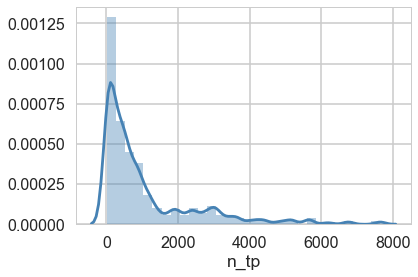

In [53]:
sns.distplot(net_data['n_tp'], bins=30, color='steelblue')

In [15]:
net_data.subj.nunique()

121

/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


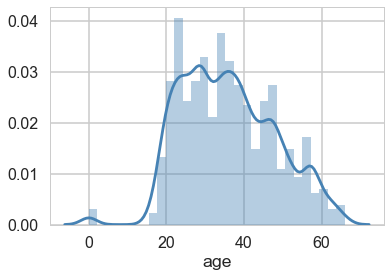

In [18]:
sns.distplot(net_data['age'], bins=30, color='steelblue')
mean_age = net_data['age'].mean()

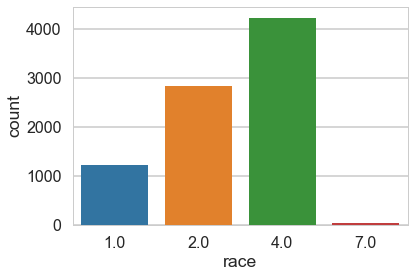

In [19]:
sns.countplot(data=net_data, x='race', )
mean_race = 4

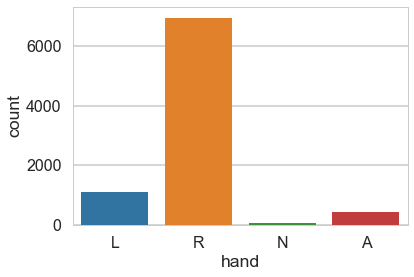

In [20]:
sns.countplot(data=net_data, x='hand', )
mean_hand = 'R'

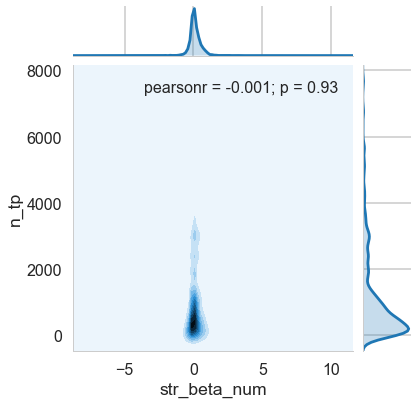

In [21]:
sns.jointplot(data=net_data, x='str_beta_num', y='n_tp', kind='kde' )

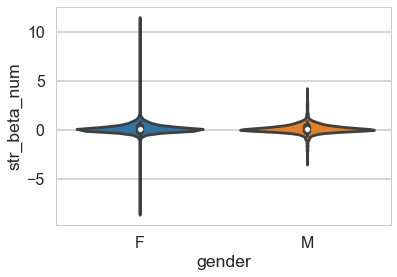

In [24]:
sns.violinplot(data=net_data, x='gender', y='str_beta_num', cut=True)

In [45]:
# add means for null values
net_data.loc[net_data['age'].isnull(), 'age'] = mean_age
net_data.loc[net_data['race'].isnull(), 'race'] = mean_race
net_data.loc[net_data['hand'].isnull(), 'hand'] = mean_hand

# same for node data
node_data.loc[node_data['age'].isnull(), 'age'] = mean_age
node_data.loc[node_data['race'].isnull(), 'race'] = mean_race
node_data.loc[node_data['hand'].isnull(), 'hand'] = mean_hand

In [28]:
net_data.dropna(inplace=True)
net_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 1 to 9280
Data columns (total 12 columns):
band_measure    7485 non-null object
soz             7485 non-null int64
n_tp            7485 non-null int64
str_beta_bin    7485 non-null float64
str_beta_num    7485 non-null float64
fc_measure      7485 non-null object
band            7485 non-null object
subj            7485 non-null object
hand            7485 non-null object
age             7485 non-null float64
gender          7485 non-null object
race            7485 non-null float64
dtypes: float64(4), int64(2), object(6)
memory usage: 760.2+ KB


In [50]:
#net_data.dropna(inplace=True)
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314250 entries, 1 to 335200
Data columns (total 22 columns):
elec                      314250 non-null object
elec_in_soz               314250 non-null int64
elec_has_spike            314250 non-null int64
band_measure              314250 non-null object
n_tp                      314250 non-null int64
str_soz_beta_bin          188640 non-null float64
str_not_soz_beta_bin      173355 non-null float64
str_spike_beta_bin        188640 non-null float64
str_not_spike_beta_bin    164835 non-null float64
tr_soz_beta_bin           270045 non-null float64
str_not_soz_beta_num      245910 non-null float64
str_spike_beta_num        270105 non-null float64
str_not_spike_beta_num    233955 non-null float64
fc_measure                314250 non-null object
band                      314250 non-null object
region                    283665 non-null object
subj                      314250 non-null object
hand                      314250 non-null object
ag

In [46]:
node_data.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 22 columns):
elec                      0 non-null object
elec_in_soz               0 non-null int64
elec_has_spike            0 non-null int64
band_measure              0 non-null object
n_tp                      0 non-null int64
str_soz_beta_bin          0 non-null float64
str_not_soz_beta_bin      0 non-null float64
str_spike_beta_bin        0 non-null float64
str_not_spike_beta_bin    0 non-null float64
tr_soz_beta_bin           0 non-null float64
str_not_soz_beta_num      0 non-null float64
str_spike_beta_num        0 non-null float64
str_not_spike_beta_num    0 non-null float64
fc_measure                0 non-null object
band                      0 non-null object
region                    0 non-null object
subj                      0 non-null object
hand                      0 non-null object
age                       0 non-null float64
gender                    0 non-null object
race                 

In [63]:
# save
net_data.to_csv('/Volumes/bassett-data/Jeni/RAM/group_analysis/net_data_clean.csv')

## Effects on Network Measures

test if intereictal spike regularly change network strength within, or outside of the seizure onset zone (SOZ)

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


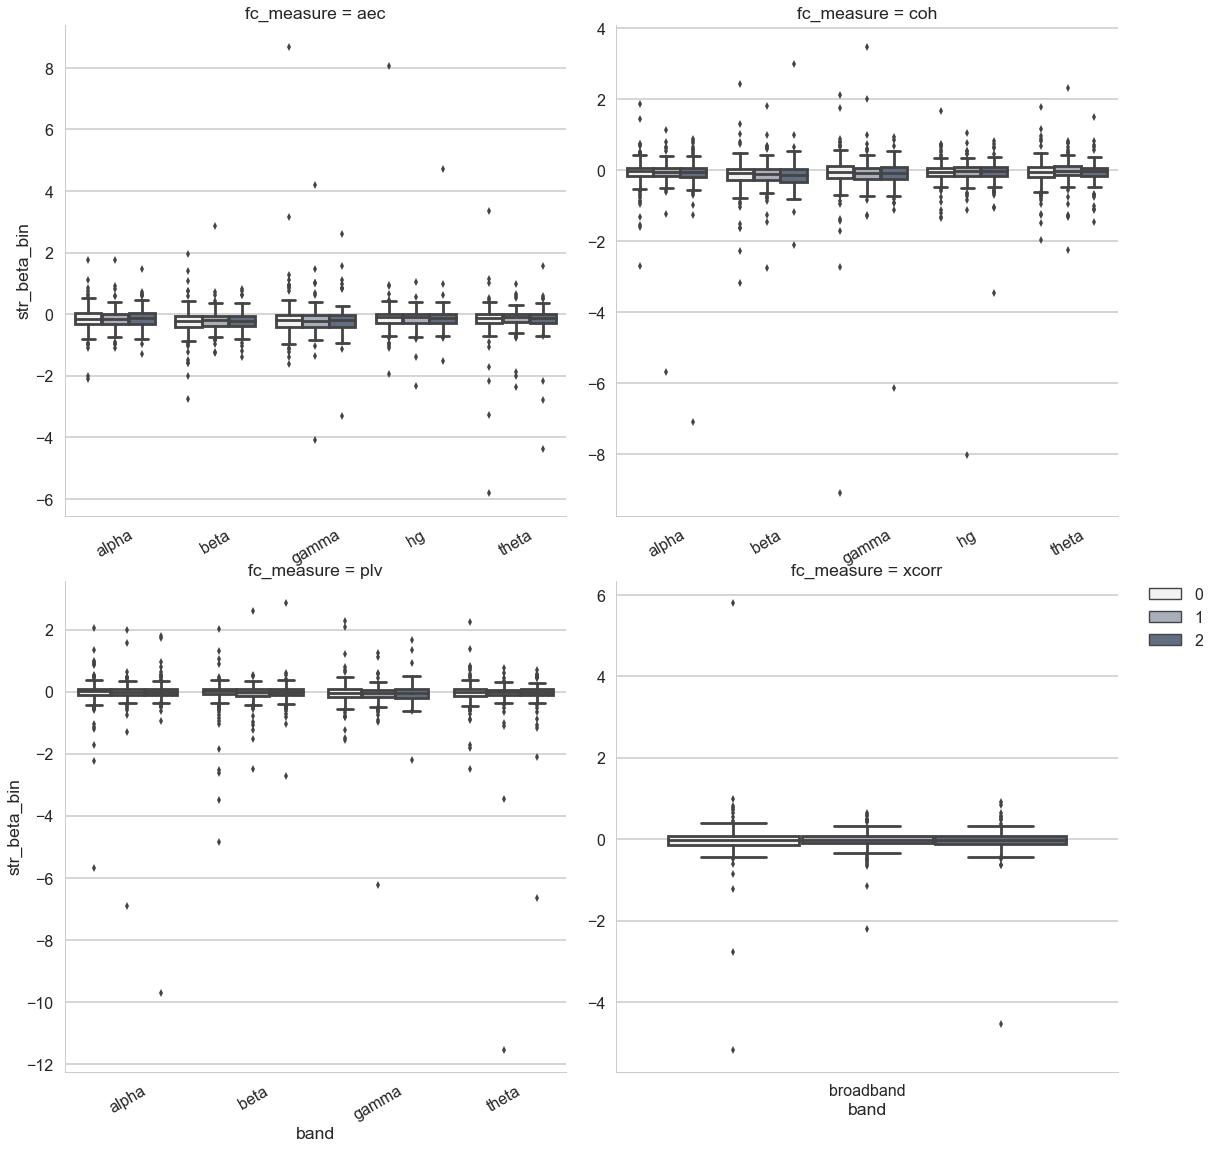

In [33]:
# color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=net_data, col='fc_measure' ,col_wrap = 2, 
                  sharex=False, sharey=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'band', 'str_beta_bin', 'soz')
#g.map(sns.stripplot, 'band', 'str_beta_bin', 'soz',jitter=True, dodge=True,
#              alpha=.25, zorder=1, size=8)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[3].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig("../img/net_bin.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


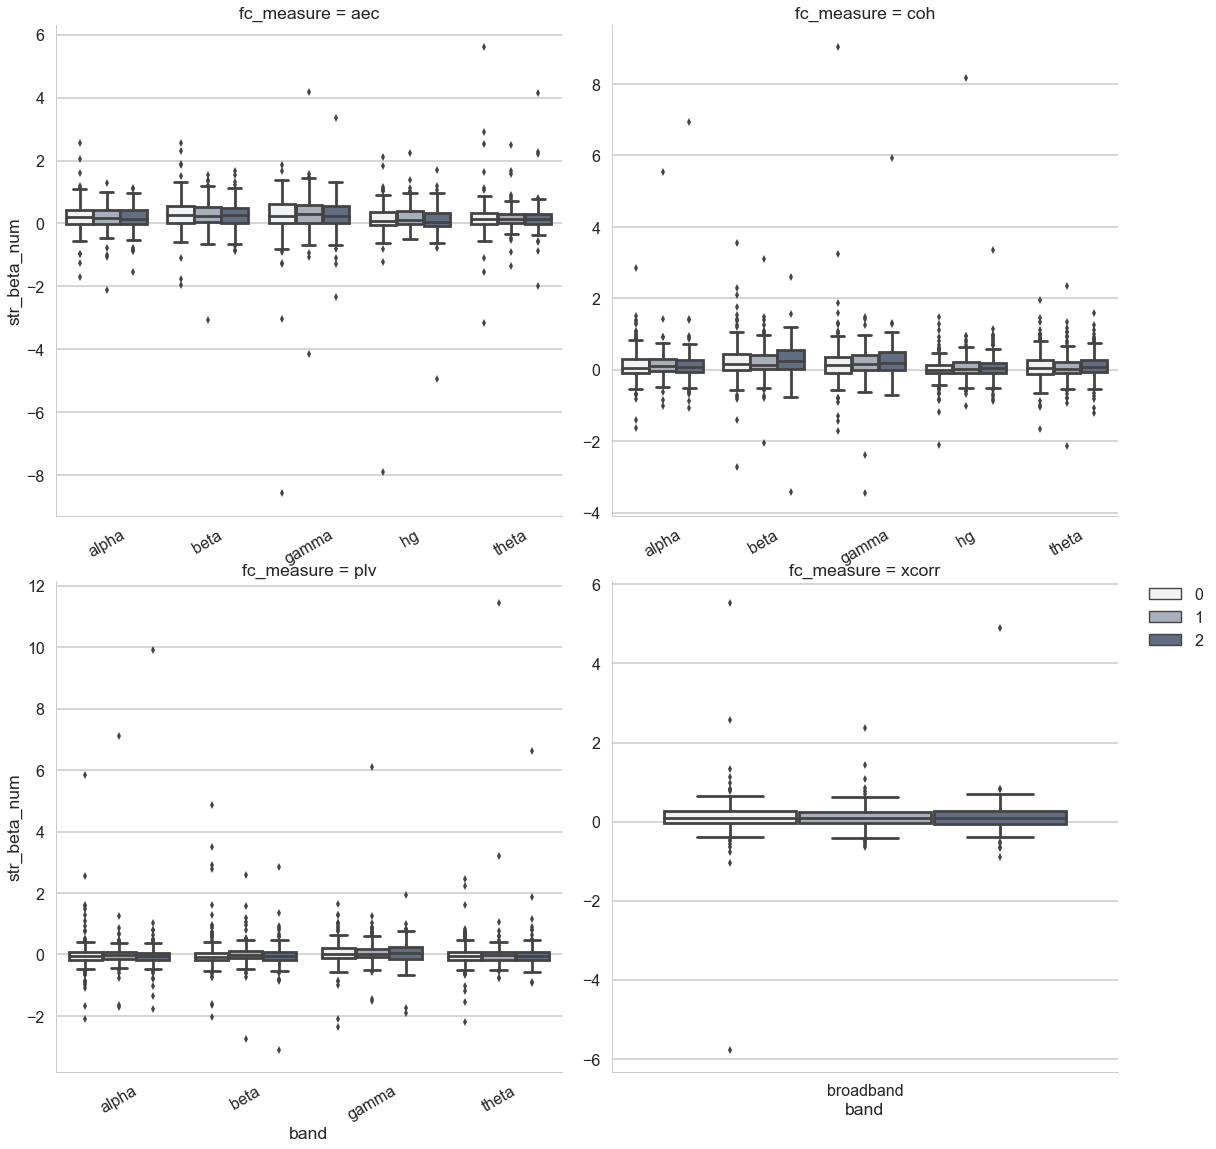

In [106]:
# grand teton palette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette(sns.color_palette(colors))

g = sns.FacetGrid(data=net_data, col='fc_measure' ,col_wrap = 2, 
                  sharex=False, sharey=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'band', 'str_beta_num', 'soz')
#g.map(sns.stripplot, 'band', 'str_beta_num', 'soz',jitter=True, dodge=True,
              #alpha=.25, zorder=1, size=8)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[3].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig("../img/net_num.eps")

## Effects on Node Measures

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


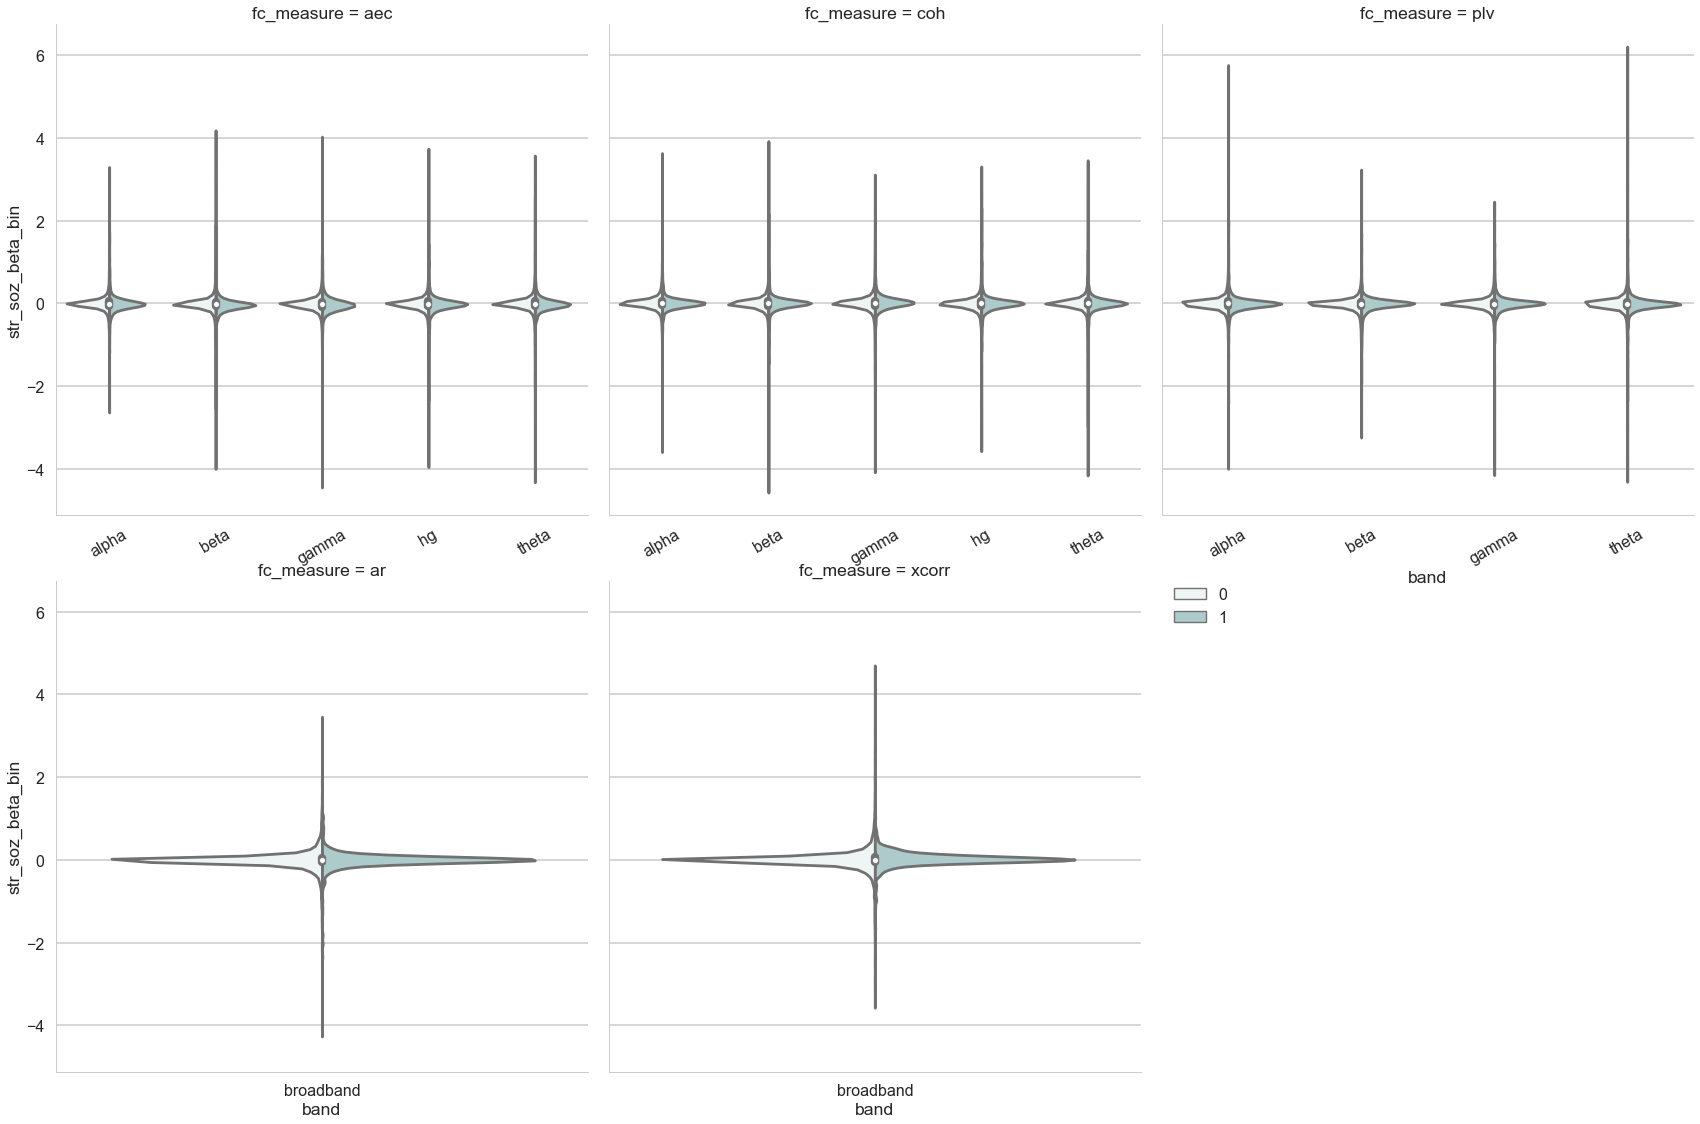

In [45]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='fc_measure' ,col_wrap = 3, 
                  sharex=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.violinplot, 'band', 'str_soz_beta_bin', 'elec_in_soz', split =True, cut=True)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


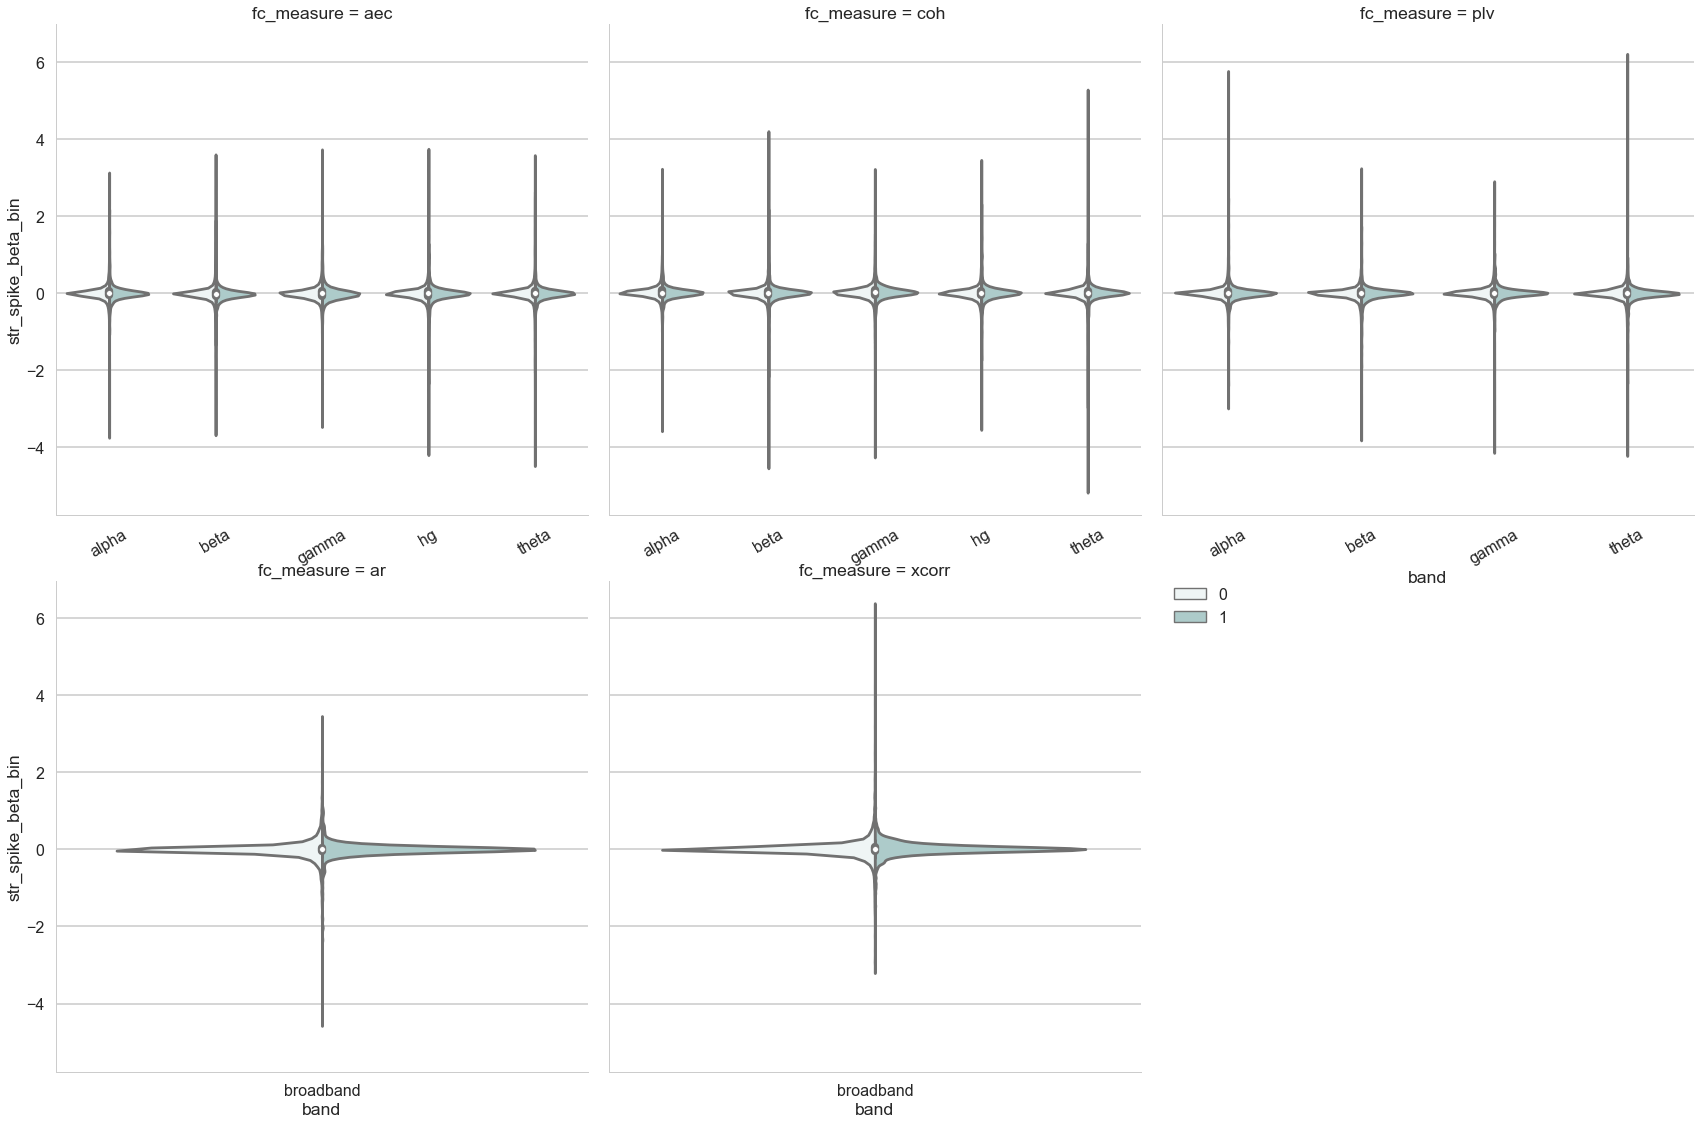

In [46]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='fc_measure', col_wrap = 3, 
                  sharex=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.violinplot, 'band', 'str_spike_beta_bin', 'elec_in_soz', split=True, cut=True)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


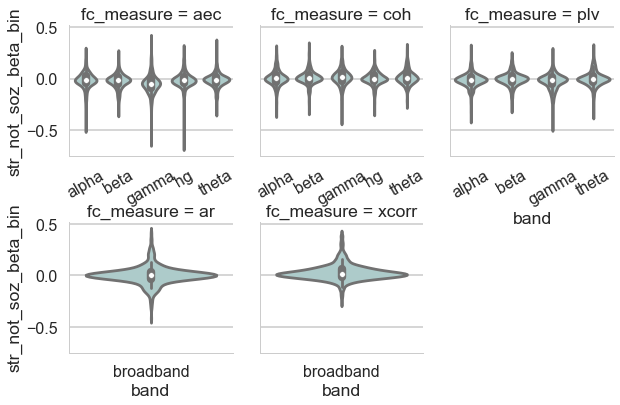

In [137]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='fc_measure', col_wrap = 3, 
                  sharex=False, legend_out=True, palette = custom_palette)
g.map(sns.violinplot, 'band', 'str_not_soz_beta_bin', height=20)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)